In [16]:
%config IPCompleter.greedy=True

# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) 335756 - Eduardo Rodrigo Ferreira
    2) 335527 - Josenilton Sergio Silva Fernandes
    3) 335535 - Leandro Queiroz Santos Silva

### Qual será seu trabalho aqui?

Basicamente, vocês devem usar todo conhecimento que adquiriram durante o curo e criar um modelo de Regressão Linear cujo RMSE seja em torno de 69000, o que significa que o erro de predição é, em média, de 69000.
Entretanto, para chegar a essa predição, uma série de análise e preparações nos dados devem ser feitas. Vocês devem fazer os todo's que aqui foram deixados a fim de chegar a esse valor numa regressão

In [2]:
# todos os pacotes que serão utilizados foram importados
# há alguns que não vimos em classe, mas parte do processo de avaliação entender como esses pacotes funcionam
# na prática, são muito similares aos que vimos em sala
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

In [3]:
# leitura dos dados
housing = pd.read_csv('bases/housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### TODO 1: Análise e visualização de dados

    1) Use o método info e o método describe para entender como os dados se comportam
    2) percebemos que existe uma coluna cujos valores são object. Quantos valores existem para cada atributo presente nessa coluna?
    3) plote um histograma de cada coluna numérica para entender a distribuição dos dados. Use 50 bins e ajuste o tamanho das imagens para (20,15)

O que você pode observar a partir dos histogramas? Os dados podem ser inseridos num algoritmo de machine learning da maneira que estão? Dica: não!! 

Tente descrever o motivo. 

In [4]:
# resposta 1
print(' \n\n-------------- housing.info --------------\n' )
housing.info()
print(' \n\n---------- housing.describe --------------\n' )
housing.describe()

 

-------------- housing.info --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
 

---------- housing.describe --------------



longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
# resposta 2
print(" \n\n---------- housing['ocean_proximity'].describe() --------------\n" )
print(housing['ocean_proximity'].describe())

print(" \n\n---------- existem apenas 5 valores unicos --------------\n" )

 

---------- housing['ocean_proximity'].describe() --------------

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object
 

---------- existem apenas 5 valores unicos --------------



 

---------- housing.hist --------------



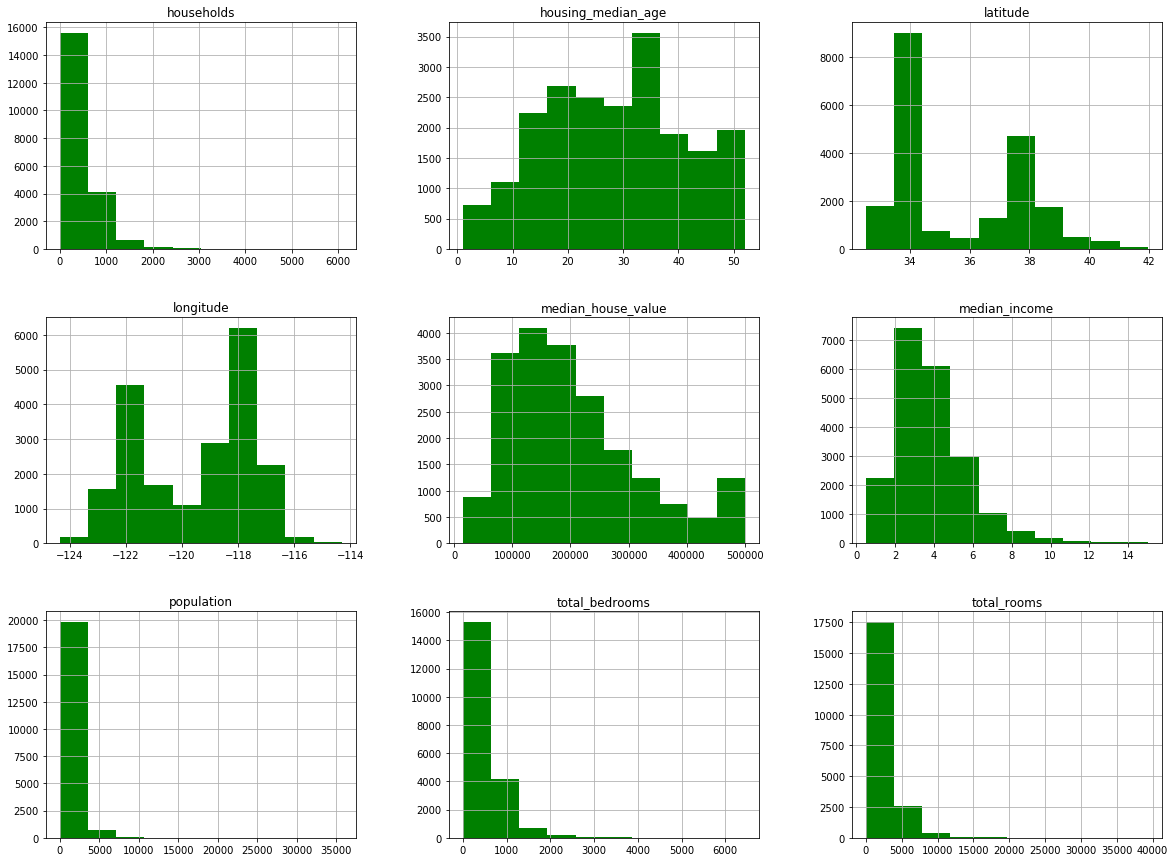

 

---------- O que você pode observar a partir dos histogramas? Os dados podem ser inseridos num algoritmo de machine learning da maneira que estão? --------------
 
---------- Resposta: Os dados precisam ser tratados antes de inputar eles no algoritmo de machine learning, precisam ser definidas as variáveis targer, os outliers precisam ser removidos e os dados normalizados--------------



In [6]:
# resposta 3
print(' \n\n---------- housing.hist --------------\n' )

housing.hist(figsize=(20,15), color = 'green')
plt.show()

print(' \n\n---------- O que você pode observar a partir dos histogramas? Os dados podem ser inseridos num algoritmo de machine learning da maneira que estão? --------------' )
##acho que a resposta é essa, baseada nas coisas que ele passou em sala de aula
print(' \n---------- Resposta: Os dados precisam ser tratados antes de inputar eles no algoritmo de machine learning, precisam ser definidas as variáveis targer, os outliers precisam ser removidos e os dados normalizados--------------\n' )

### TODO 2: Criando conjunto de treino e teste
    4) utilizando train_test_split, da Scikit-Learn, separe o conjunto em treino e teste. utilize train_set e test_set como nome de variáveis, separe 20% para conjunto de teste e utilize 42 como random_state

In [7]:
# resposta 4
print(' \n\n---------- separando o conjunto em treino/teste --------------\n' )
x_train_set, x_test_set = train_test_split(housing, test_size=0.20, random_state=42)

print(' \n---------- x_train_set.info() --------------\n' )
print(x_train_set.info())

print(' \n\n---------- x_test_set.info() --------------\n' )
print(x_test_set.info())

 

---------- separando o conjunto em treino/teste --------------

 
---------- x_train_set.info() --------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None
 

---------- x_test_set.info() --------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age 

### TODO 3: Correlação e visualização

    5) Quais as variáveis que mais possuem correlação com o atributo median_house_value?
    6) Utilize scatter_matrix, do pandas para visualizar a correlação do atributo median_house_value com os atributos que possuem maior correlação com ele. Ajuste o tamanho das imagens para (12, 8)

In [8]:
# resposta 5
print(' \n\n---------- Correlação das variáveis com o atributo median_house_value --------------\n' )
housing_corr_matrix = housing.corr()
housing_corr_matrix['median_house_value'].sort_values(ascending=False)


 

---------- Correlação das variáveis com o atributo median_house_value --------------



median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4502bed550>,
      dtype=object)

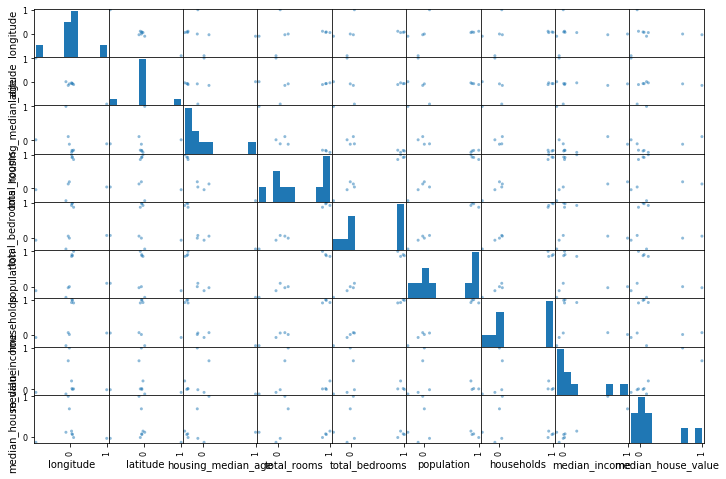

In [16]:
# resposta 6

# não sei se está certo
scatter_matrix(housing_corr_matrix, figsize=(12,8))


### TODO 4: Limpeza de dados

Ao usar o método info(), descobrimos que existem alguns dados faltantes no nosso algoritmo. A partir daqui, a variável housing será o conteúdo de train_set, excluindo-se a coluna meta (median_house_value).  Atribua para a variável housing_labels uma cópia de train_set só com informações da coluna meta

    7) use simpleImputer para tratar os valores faltantes. Escolha a estratégia que achar mais conveniente

In [20]:
# resposta 7

# del housing['median_house_value']

housing.info()

KeyError: 'median_house_value'

### TODO 4: Manipulação de Atributos categóricos
    7) Utilizando OrdinalEncoder, manipule os valores categóricos para preparar os dados corretamente para algoritmos de machine learning

In [ ]:
# resposta 7

### TODO 5: Feature Normalization

Com algumas poucas exceções, algoritmos de machine learning não performam bem quando os atributos numéricos possuem escalas diferentes. Este é o caso de nosso dataset, em que o atributo total_rooms possui um range de 6 a 39320 enquanto median_income varia de 0.5 a 15.

Existem duas abordagens conhecidas para trazer os atributos para uma mesma escala: min-max scaling e standardization. 

min-max scaling (normalization) consiste em subtratir o valor minimo e dividir pela subtração de max por min:

\begin{align}
x = \frac{x - min}{max - min}
\end{align}

A Scikit-Learn provê o método MinMaxScaler que realiza essa operação. 

Já standardization consiste em subtrair a média(valores sempre terao média zero) e então dividir pela variância de modo que a distribuição resultante possua variância unitária. 

\begin{align}
x = \frac{x - \mu}{\sigma}
\end{align}

Diferentemente de normalization, standardization não leva os números a um intervalo específico, o que pode ser um problema para algoritmos específicos (por exemplo, redes neurais geralmente esperam um valor de entrada entre o intervalo 0-1). Entretanto, standdardization é muito menos sensível à outiliers. Scikit-learn provêo método StandardScaler para standardization. 

    8) Adeque os valores de cada coluna numérica para que eles fiquem normalizados. Use o método que achar mais conveniente

In [ ]:
# resposta 8

### TODO 6: Pipeline de Transformação
    9) crie um pipeline de transformação para tratar os atributos numéricos, outro para tratar os atributos categóricos e um para juntar os dois e preparar todos os dados para entrada num algoritmo de machine learning. Caso queira, pode usar a classe DataFrameSelector vista na aula 4 (recomendável). A variável de saída desse algoritmo deverá se chamar housing_prepared


In [ ]:
# resposta 9

### TODO 7: Regressão Linear

    10) Ajuste uma regressão linear aos dados. Utilize a versão da Scikit-Learn

In [ ]:
# resposta 10

In [ ]:
# Apenas para testar seu resultado
some_data = housing.iloc[:5] # dados para predizer
some_labels = housing_labels.iloc[:5] # rótulos dos dados acima
some_data_prepared = full_pipeline.transform(some_data) # transformação dos dados (considerando que seu pipeline tenha esse nome)
print("Predictions:\t", lin_reg.predict(some_data_prepared)) # predizendo
print("Labels:\t\t", list(some_labels)) # valores corretos

### TODO 8: RMSE 
    11) Utilizando Scikit-Learn, extraia o RMSE das predições a partir da variável housing_prepared. 

In [ ]:
# resposta 11